In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# generate normalized data

def normalize(trees, n):
    # https://www.datacamp.com/tutorial/principal-component-analysis-in-python
    x = trees.values
    x = StandardScaler().fit_transform(x)
    title = []
    for i in range(2**(n-1) - 1):
        title.append(i)
    normal_tree = pd.DataFrame(x, columns = title)
    return normal_tree


def PCAtrees(trees):
    # get values in dataframe
    x = trees.values
    # determine the column number
    pca = PCA(n_components = 2)
    pca_tree = pca.fit_transform(x)
    pca_df = pd.DataFrame(pca_tree, columns = ["feature0" ,"feature1"])
    return pca_df


# draw samples from trees
import random
def draw(trees, n = 1000):
    value = trees.values.tolist()
    sample = random.sample(value, n)
    sample_df = pd.DataFrame(sample)
    return sample_df


from sklearn.manifold import TSNE

def tSNEtrees(trees, label):
    x = trees.values
    tsne = TSNE(2)
    tsne_tree = tsne.fit_transform(x)
    tsne_df = pd.DataFrame(tsne_tree, columns = ["feature0" ,"feature1"])
    final_df = pd.concat([tsne_df,label], axis = 1)
    return final_df

In [30]:
from sklearn.cluster import KMeans

# k-means.https://koalatea.io/python-plot-kmeans-clusters/
def kmeans_tree(tree, num=2):
    model = KMeans(n_clusters = num, random_state=0)
    label = model.fit_predict(tree)
    label_df = pd.DataFrame(label, columns = ["label"])
    return label_df

def plot_kmeans_cluster(tree, n=2):
    label_df = kmeans_tree(tree, n)
    PCA_trees = PCAtrees(tree)
    final_df = pd.concat([PCA_trees,label_df], axis = 1)
    final_df.plot.scatter(x = "feature0", y = "feature1", c ='label',cmap="viridis",figsize=(20,8))

In [31]:
from sklearn import mixture

# Gaussian mixture model https://scikit-learn.org/stable/modules/mixture.html  
# https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
def GMM_tree(tree, num=2):
    model = mixture.GaussianMixture(n_components=num, random_state = 0,covariance_type='full')
    label = model.fit_predict(tree)
    label_df = pd.DataFrame(label, columns = ["label"])
    return label_df

def plot_GMM_cluster(tree, n=2):
    label_df = GMM_tree(tree, n)
    PCA_trees = PCAtrees(tree)
    final_df = pd.concat([PCA_trees,label_df], axis = 1)
    final_df.plot.scatter(x = "feature0", y = "feature1", c ='label',cmap="viridis",figsize=(20,8))

In [32]:
from sklearn.cluster import SpectralClustering

# Spectral Clustering https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html
def SC_tree(tree, num=2):
    model = SpectralClustering(n_clusters = num, random_state = 0, affinity ='rbf')
    label = model.fit_predict(tree)
    label_df = pd.DataFrame(label, columns = ["label"])
    return label_df

def plot_SC_cluster(tree, n=2):
    label_df = SC_tree(tree, n)
    PCA_trees = PCAtrees(tree)
    final_df = pd.concat([PCA_trees,label_df], axis = 1)
    final_df.plot.scatter(x = "feature0", y = "feature1", c ='label',cmap="viridis",figsize=(20,8))

In [71]:
def actual_combine(df1, df2):
    label = pd.DataFrame({'label': [1] * len(df1.index) + [2] * len(df2.index)})
    combine = pd.concat([df1, df2],ignore_index=True,sort=False)
    combine = normalize(combine, 4)
    combine = PCAtrees(combine)
    final_df = pd.concat([combine,label], axis = 1)
    return final_df

In [72]:
# (((1:1,2:1):1,3:2):1,4:3)
one = pd.read_csv("./data/one.csv")

# ((1:0.5,2:0.5):3.5,(3:3.2,4:3.2):0.8)
two = pd.read_csv("./data/two.csv")

# ((1:2,2:2):2,(3:1.5,4:1.5):2.5)
three = pd.read_csv("./data/three.csv")

# (((1:0.75,2:0.75):0.75,3:1.5):2.5,4:4)
four = pd.read_csv("./data/four.csv")

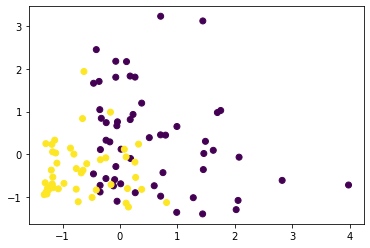

In [78]:
combine = [one,two]
trees = pd.concat(combine)
normal_tree = normalize(trees, 4)
label_df = kmeans_tree(normal_tree, 2)

import matplotlib.pyplot as plot

#get cols
tree_0 = np.array(normal_tree.iloc[:,1])
tree_1 = np.array(normal_tree.iloc[:,3])
label = np.array(label_df)

plot.scatter(tree_0, tree_1, c = label)

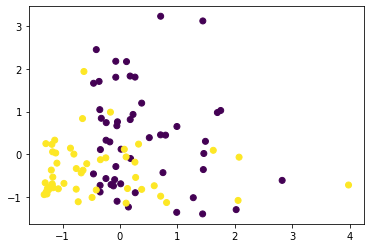

In [79]:
actual_label = pd.DataFrame({'label': [1] * len(one.index) + [2] * len(two.index)})
tree_0 = np.array(normal_tree.iloc[:,1])
tree_1 = np.array(normal_tree.iloc[:,3])
label = np.array(actual_label)

plot.scatter(tree_0, tree_1, c = label)

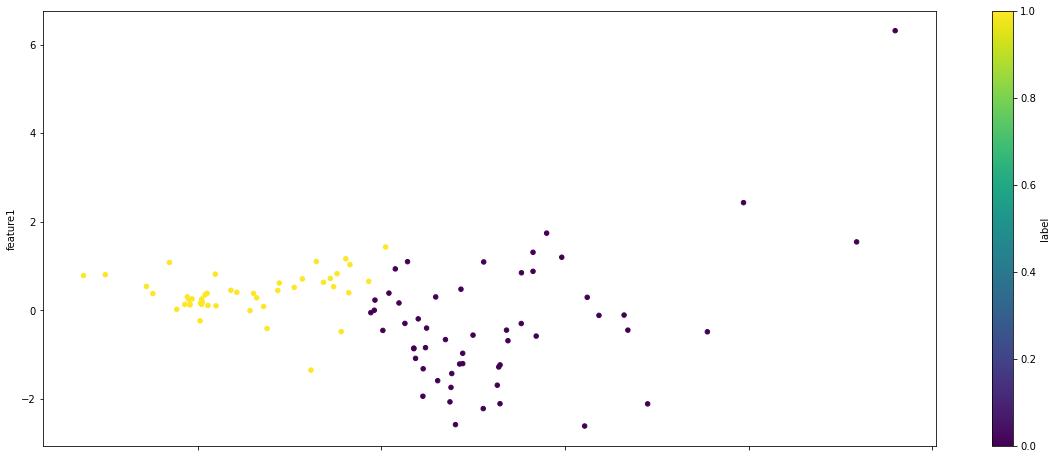

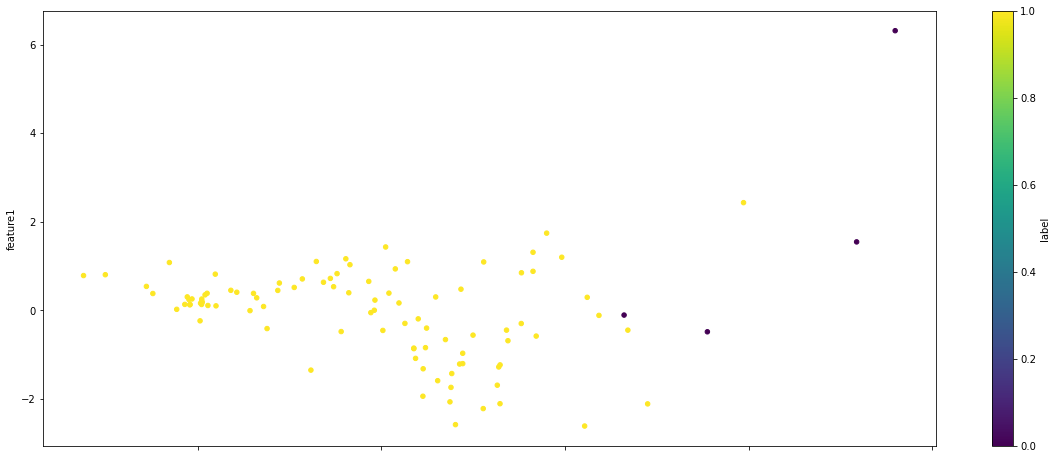

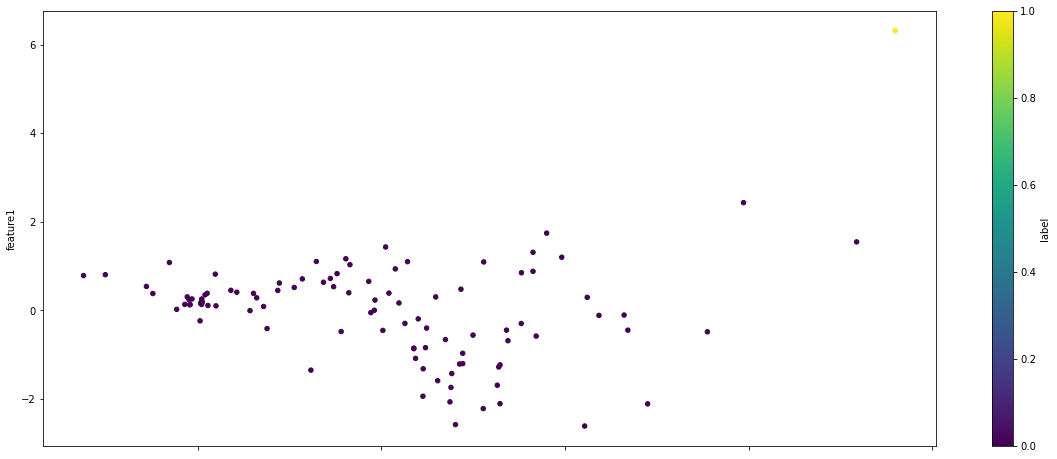

In [64]:
trees = pd.concat([one, two],ignore_index=True,sort=False)
trees = normalize(trees, 4)
plot_kmeans_cluster(trees, 2);
plot_GMM_cluster(trees, 2);
plot_SC_cluster(trees, 2);

<AxesSubplot:xlabel='feature0', ylabel='feature1'>

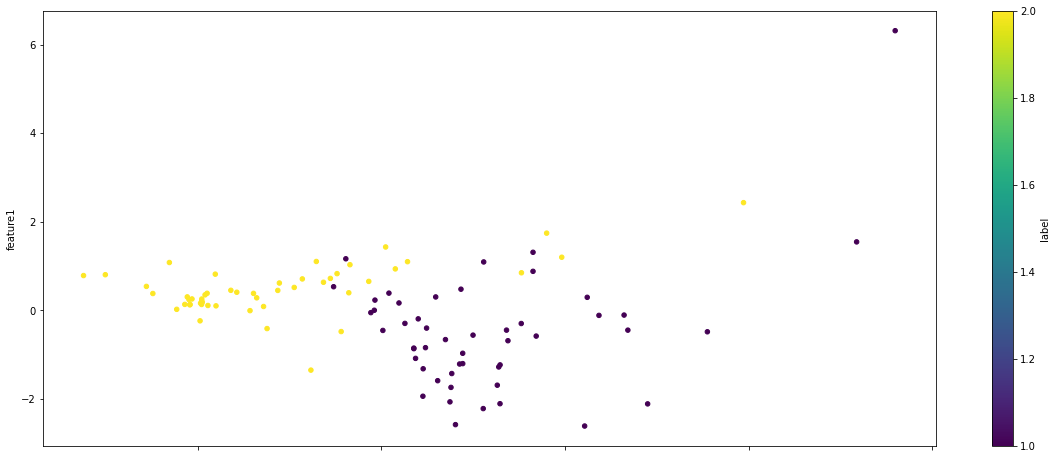

In [73]:
combine = actual_combine(one,two)
combine.plot.scatter(x = "feature0", y = "feature1", c ='label',cmap="viridis",figsize=(20,8))

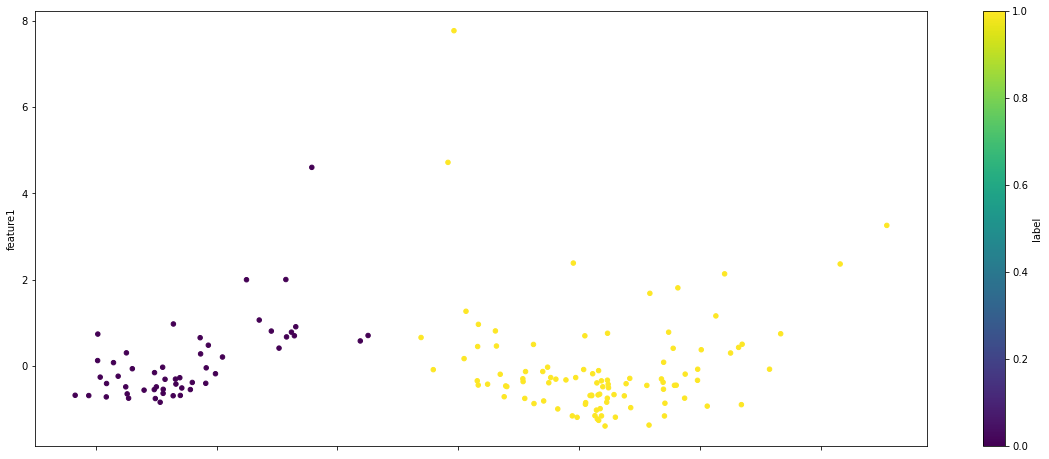

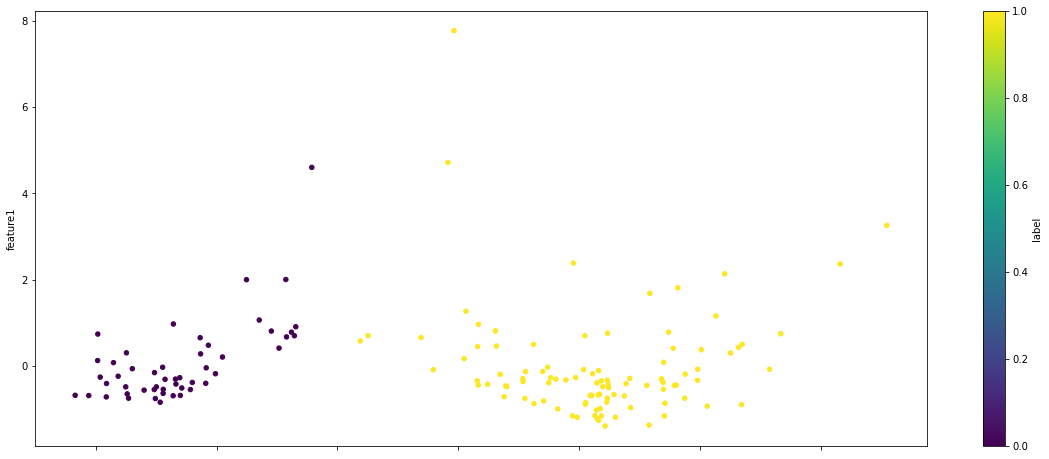

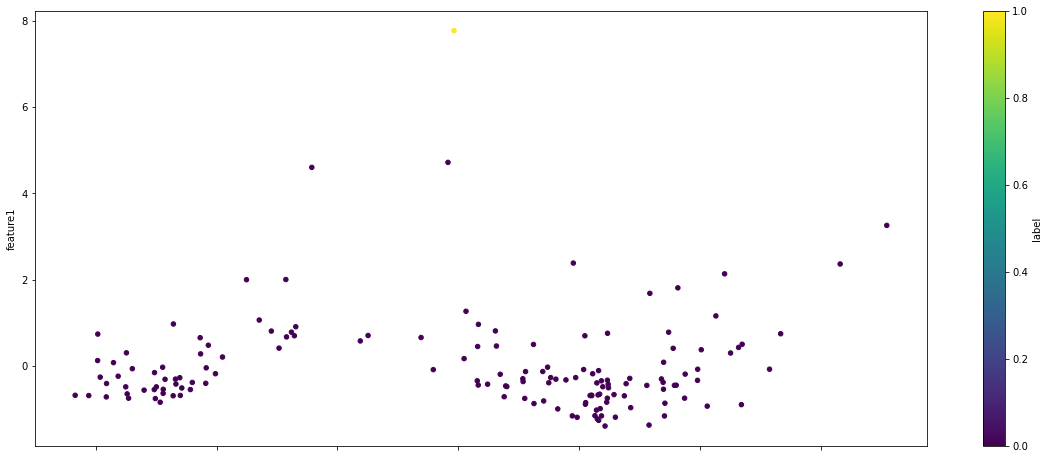

In [66]:
trees = pd.concat([one, three],ignore_index=True,sort=False)
trees = normalize(trees, 4)
plot_kmeans_cluster(trees, 2)
plot_GMM_cluster(trees, 2)
plot_SC_cluster(trees, 2)

<AxesSubplot:xlabel='feature0', ylabel='feature1'>

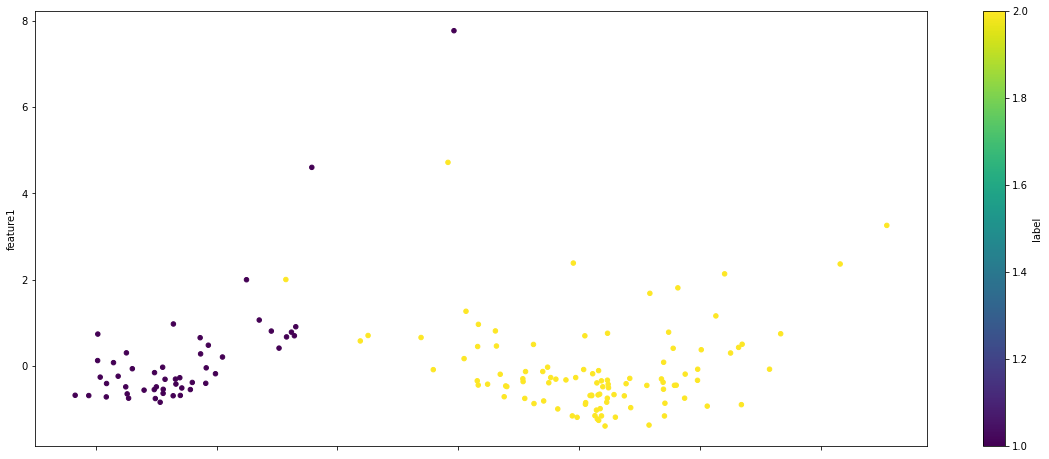

In [74]:
combine = actual_combine(one,three)
combine.plot.scatter(x = "feature0", y = "feature1", c ='label',cmap="viridis",figsize=(20,8))

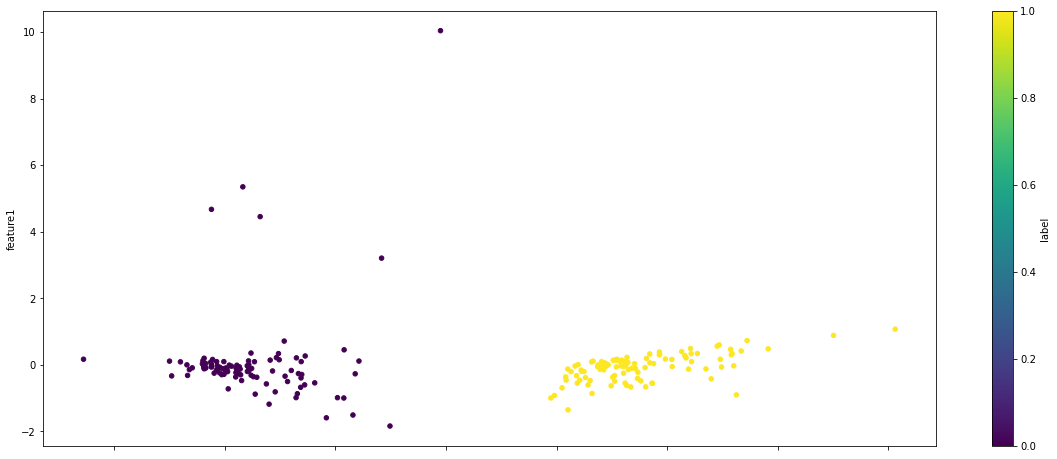

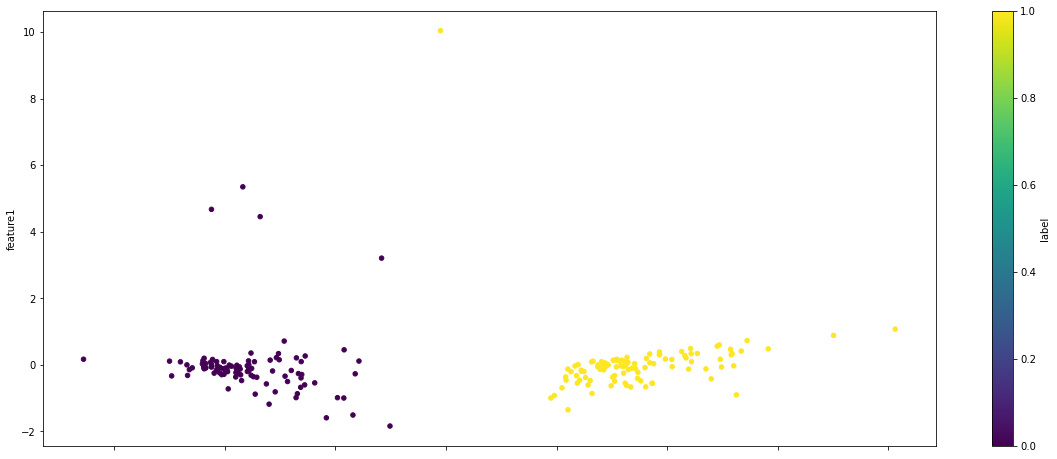

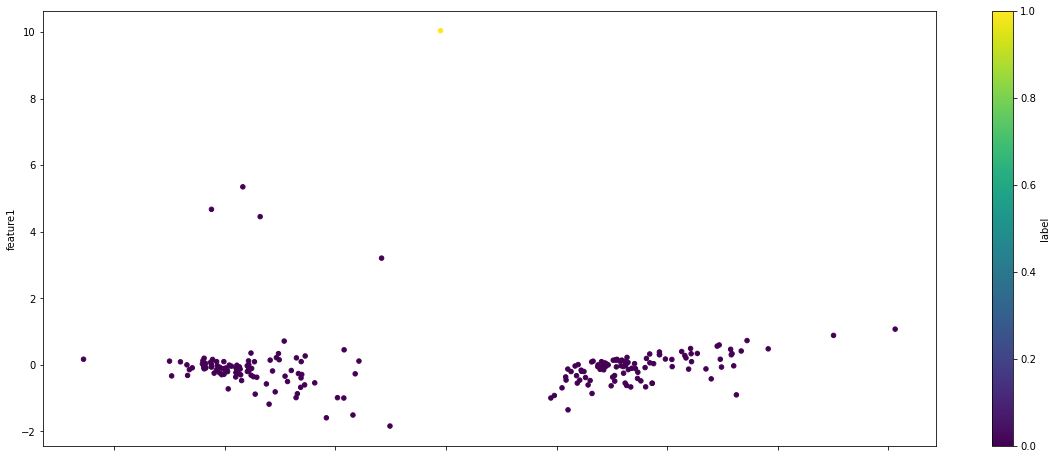

In [67]:
trees = pd.concat([three, four],ignore_index=True,sort=False)
trees = normalize(trees, 4)
plot_kmeans_cluster(trees, 2)
plot_GMM_cluster(trees, 2)
plot_SC_cluster(trees, 2)

<AxesSubplot:xlabel='feature0', ylabel='feature1'>

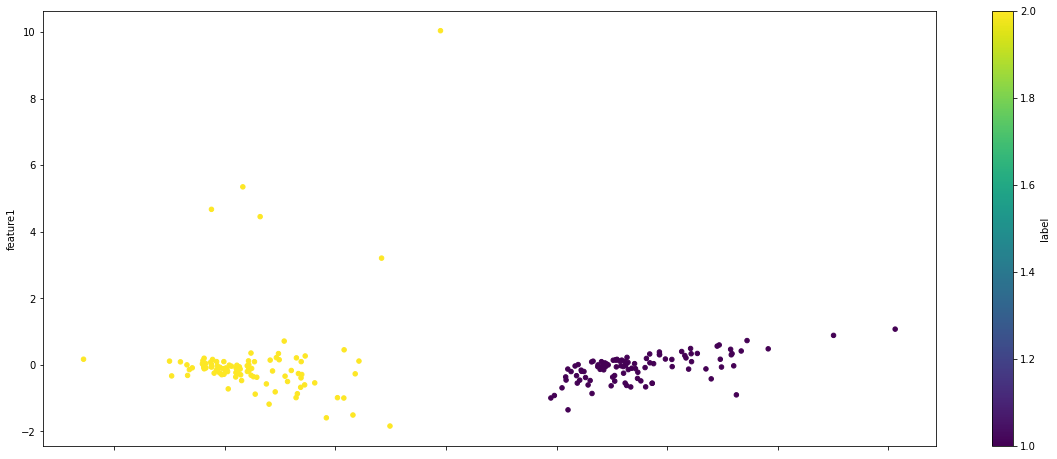

In [75]:
combine = actual_combine(three,four)
combine.plot.scatter(x = "feature0", y = "feature1", c ='label',cmap="viridis",figsize=(20,8))